In [1]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpol
from pyccl._core import UnlockInstance
from scipy import signal

# BCM

In [3]:
import BCMprofiles_Copy2 as BCMprofiles
BCMprofiles.__all__

('StellarProfile',
 'EjectedGasProfile',
 'BoundGasProfile',
 'CombinedGasProfile',
 'CombinedStellarGasProfile',
 'CombinedAllBCMProfile')

## Setting up pars & profiles

In [7]:
hmd_200c = ccl.halos.MassDef200c # use a mass definition with Delta = 200
cM = ccl.halos.ConcentrationDuffy08(mass_def=hmd_200c)
cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.07, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)

trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
trial_k = np.geomspace(1E-3,1E2,100000) # np.geomspace(1E-3,1E2,100000)
trial_M = np.array([3E12,6E13, 1E14])
trial_gamma = 1.1  # working with z = 0 (today) ; therefore a = 1 [default]
trial_f_bd = 0.6

## Loading profiles, with fourier_analytic = True

In [9]:
stel_profile = BCMprofiles.StellarProfile(cosmo, hmd_200c)
ej_profile = BCMprofiles.EjectedGasProfile(cosmo, hmd_200c)
bd_profile = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, trial_gamma)
gas_profile = BCMprofiles.CombinedGasProfile(cosmo, hmd_200c, cM, trial_gamma)
stelGas_profile = BCMprofiles.CombinedStellarGasProfile(cosmo, hmd_200c, cM, trial_gamma) 
bcm_profile = BCMprofiles.CombinedAllBCMProfile(cosmo, hmd_200c, cM, trial_gamma)

In [11]:
stel_real = stel_profile._real(cosmo, trial_r, trial_M)
ej_real = ej_profile._real(cosmo, trial_r, trial_M)
bd_real = bd_profile._real(cosmo, trial_r, trial_M)
gas_real = gas_profile._real(cosmo, trial_r, trial_M, trial_f_bd)
stelGas_real = stelGas_profile._real(cosmo, trial_r, trial_M)
bcm_real = bcm_profile._real(cosmo, trial_r, trial_M)

/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:153: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I0_array[k] =  integrate.quad(self._innerInt, 0, np.inf, args = 1/(i-1))[0]
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:153: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I0_array[k] =  integrate.quad(self._innerInt, 0, np.inf, args = 1/(i-1))[0]


In [13]:
stel_fourier = stel_profile._fourier(trial_k, trial_M)
ej_fourier = ej_profile._fourier(trial_k, trial_M)
bd_fourier = bd_profile._fourier(trial_k, trial_M)
gas_fourier = gas_profile._fourier(trial_k, trial_M, trial_f_bd)
stelGas_fourier = stelGas_profile._fourier(trial_k, trial_M)
bcm_fourier = bcm_profile._fourier(trial_k, trial_M)

/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:138: RuntimeWarning: invalid value encountered in scalar divide
  return (np.log(1+x)/x)**gam_use
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:196: IntegrationWarning: The maximum number of cycles allowed has been achieved., e.e.
  of subintervals (a+(k-1)c, a+kc) where c = (2*int(abs(omega)+1))
  *pi/abs(omega), for k = 1, 2, ..., lst.  One can allow more cycles by increasing the value of limlst.  Look at info['ierlst'] with full_output=1.
  I0_array[k, l] =  integrate.quad(integralQany, 0, np.inf, args = 1/(i-1), weight = "sin", wvar=j)[0] / j


k = 1.56% through


/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:196: IntegrationWarning: Bad integrand behavior occurs within one or more of the cycles.
  Location and type of the difficulty involved can be determined from 
  the vector info['ierlist'] obtained with full_output=1.
  I0_array[k, l] =  integrate.quad(integralQany, 0, np.inf, args = 1/(i-1), weight = "sin", wvar=j)[0] / j


k = 3.12% through
k = 4.69% through
k = 6.25% through
k = 7.81% through
k = 9.38% through
k = 10.9% through
k = 12.5% through
k = 14.1% through
k = 15.6% through
k = 17.2% through
k = 18.8% through
k = 20.3% through
k = 21.9% through
k = 23.4% through
k = 25% through
k = 26.6% through


/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:196: IntegrationWarning: The extrapolation table constructed for convergence acceleration
  of the series formed by the integral contributions over the cycles, 
  does not converge to within the requested accuracy.  Look at 
  info['ierlst'] with full_output=1.
  I0_array[k, l] =  integrate.quad(integralQany, 0, np.inf, args = 1/(i-1), weight = "sin", wvar=j)[0] / j


k = 28.1% through
k = 29.7% through
k = 31.2% through
k = 32.8% through
k = 34.4% through
k = 35.9% through
k = 37.5% through
k = 39.1% through
k = 40.6% through
k = 42.2% through
k = 43.8% through
k = 45.3% through
k = 46.9% through
k = 48.4% through
k = 50% through
k = 51.6% through
k = 53.1% through
k = 54.7% through
k = 56.2% through
k = 57.8% through
k = 59.4% through
k = 60.9% through
k = 62.5% through
k = 64.1% through
k = 65.6% through
k = 67.2% through
k = 68.8% through
k = 70.3% through
k = 71.9% through
k = 73.4% through
k = 75% through
k = 76.6% through
k = 78.1% through
k = 79.7% through
k = 81.2% through
k = 82.8% through
k = 84.4% through
k = 85.9% through
k = 87.5% through
k = 89.1% through
k = 90.6% through
k = 92.2% through
k = 93.8% through
k = 95.3% through
k = 96.9% through
k = 98.4% through
k = 100% through


/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:219: RuntimeWarning: overflow encountered in divide
  g_k = self._func_normQany((self.gamma, np.log(q_use))) / self._func_normQ0(self.gamma) # = Ib_qAny / Ib_q0
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy2.py:222: RuntimeWarning: overflow encountered in multiply
  prof = prefix[:, None] * g_k[None,:]


k = 1.56% through
k = 3.12% through
k = 4.69% through
k = 6.25% through
k = 7.81% through
k = 9.38% through
k = 10.9% through
k = 12.5% through
k = 14.1% through
k = 15.6% through
k = 17.2% through
k = 18.8% through
k = 20.3% through
k = 21.9% through
k = 23.4% through
k = 25% through
k = 26.6% through
k = 28.1% through
k = 29.7% through
k = 31.2% through
k = 32.8% through
k = 34.4% through
k = 35.9% through
k = 37.5% through
k = 39.1% through
k = 40.6% through
k = 42.2% through
k = 43.8% through
k = 45.3% through
k = 46.9% through
k = 48.4% through
k = 50% through
k = 51.6% through
k = 53.1% through
k = 54.7% through
k = 56.2% through
k = 57.8% through
k = 59.4% through
k = 60.9% through
k = 62.5% through
k = 64.1% through
k = 65.6% through
k = 67.2% through
k = 68.8% through
k = 70.3% through
k = 71.9% through
k = 73.4% through
k = 75% through
k = 76.6% through
k = 78.1% through
k = 79.7% through
k = 81.2% through
k = 82.8% through
k = 84.4% through
k = 85.9% through
k = 87.5% throug

## Loading profiles, with fourier_analytic = False

In [15]:
stel_profile_false = BCMprofiles.StellarProfile(cosmo, hmd_200c, fourier_analytic=False)
ej_profile_false = BCMprofiles.EjectedGasProfile(cosmo, hmd_200c, fourier_analytic=False)
bd_profile_false = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, trial_gamma, fourier_analytic=False)
gas_profile_false = BCMprofiles.CombinedGasProfile(cosmo, hmd_200c, cM, trial_gamma, fourier_analytic=False)
stelGas_profile_false = BCMprofiles.CombinedStellarGasProfile(cosmo, hmd_200c, cM, trial_gamma, fourier_analytic=False) 
bcm_profile_false = BCMprofiles.CombinedAllBCMProfile(cosmo, hmd_200c, cM, trial_gamma, fourier_analytic=False)

In [17]:
stel_real_false = stel_profile_false._real(cosmo, trial_r, trial_M)
ej_real_false = ej_profile_false._real(cosmo, trial_r, trial_M)
bd_real_false = bd_profile_false._real(cosmo, trial_r, trial_M)
gas_real_false = gas_profile_false._real(cosmo, trial_r, trial_M, trial_f_bd)
stelGas_real_false = stelGas_profile_false._real(cosmo, trial_r, trial_M)
bcm_real_false = bcm_profile_false._real(cosmo, trial_r, trial_M)

In [19]:
ccl.halos.profiles.HaloProfile.fourier

<function pyccl.halos.profiles.profile_base.HaloProfile.fourier(self, cosmo, k, M, a)>

In [21]:
stel_fourier_false = stel_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
ej_fourier_false = ej_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
bd_fourier_false = bd_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
gas_fourier_false = gas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
# stelGas_fourier_false = stelGas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
# bcm_fourier_false = bcm_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)

In [23]:
stelGas_fourier_false = stelGas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
bcm_fourier_false = bcm_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)

ValueError: rs should have 3 elements

## Checking the plots

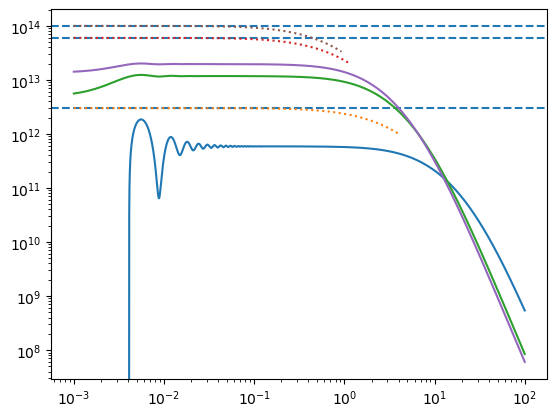

In [66]:
four_plot, four_plot2 = bd_fourier_false, bd_fourier[0]
for prof, prof2, mass in zip(four_plot, four_plot2, trial_M):
    plt.plot(trial_k, prof)
    plt.plot(trial_k, prof2, ':')
    plt.axhline(mass, linestyle='--', zorder=1)
plt.yscale('log')
plt.xscale('log');

## g
Need to go back & fix up stelGas & bcm false_fouriers, but 1st: integrate others => should get M

In [27]:
print(trial_M)

[3.e+12 6.e+13 1.e+14]


In [29]:
print('Trapezoid method \n Analytical')
print('stellar: ', integrate.trapezoid(stel_fourier, x=trial_k))
print('ejected: ', integrate.trapezoid(ej_fourier, x=trial_k))
print('bound: ', integrate.trapezoid(bd_fourier, x=trial_k))
print('gas: ', integrate.trapezoid(gas_fourier, x=trial_k), '\n\n Numerical')

print('stellar: ', integrate.trapezoid(stel_fourier_false, x=trial_k))
print('ejected: ', integrate.trapezoid(ej_fourier_false, x=trial_k))
print('bound: ', integrate.trapezoid(bd_fourier_false, x=trial_k))
print('gas: ', integrate.trapezoid(gas_fourier_false, x=trial_k))

Trapezoid method 
 Analytical
stellar:  [2.99997e+14 5.99994e+15 9.99990e+15]
ejected:  [1.02384014e+12 7.50582381e+12 1.05354392e+13]
bound:  [[inf inf inf]]
gas:  [inf inf inf] 

 Numerical
stellar:  [1.64726582e+07 3.29453165e+08 5.49088608e+08]
ejected:  [7.25649455e+12 2.37879513e+14 4.31042936e+14]
bound:  [5.98081690e+12 3.44629810e+13 4.64128171e+13]
gas:  [5.98081690e+12 3.44629810e+13 4.64128171e+13]


In [31]:
print('Simpson method \n Analytical')
print('stellar: ', integrate.simpson(stel_fourier, x=trial_k))
print('ejected: ', integrate.simpson(ej_fourier, x=trial_k))
print('bound: ', integrate.simpson(bd_fourier, x=trial_k))
print('gas: ', integrate.simpson(gas_fourier, x=trial_k), '\n\n Numerical')

print('stellar: ', integrate.simpson(stel_fourier_false, x=trial_k))
print('ejected: ', integrate.simpson(ej_fourier_false, x=trial_k))
print('bound: ', integrate.simpson(bd_fourier_false, x=trial_k))
print('gas: ', integrate.simpson(gas_fourier_false, x=trial_k))

Simpson method 
 Analytical
stellar:  [2.99997e+14 5.99994e+15 9.99990e+15]
ejected:  [1.02384014e+12 7.50582380e+12 1.05354391e+13]
bound:  [[nan nan nan]]
gas:  [nan nan nan] 

 Numerical
stellar:  [1.64726581e+07 3.29453162e+08 5.49088603e+08]
ejected:  [7.25649453e+12 2.37879513e+14 4.31042935e+14]
bound:  [5.98081689e+12 3.44629809e+13 4.64128170e+13]
gas:  [5.98081689e+12 3.44629809e+13 4.64128170e+13]


/opt/anaconda3/lib/python3.12/site-packages/scipy/integrate/_quadrature.py:808: RuntimeWarning: invalid value encountered in subtract
  result += alpha*y[slice1] + beta*y[slice2] - eta*y[slice3]


# Check integration of NFW => get same values for True & False, but don't get masses

In [34]:
NFWprofile_false = ccl.halos.profiles.nfw.HaloProfileNFW(mass_def = hmd_200c, concentration = cM, fourier_analytic=False) 
NFWprofile_true = ccl.halos.profiles.nfw.HaloProfileNFW(mass_def = hmd_200c, concentration = cM, fourier_analytic=True) 

In [36]:
nfw_real_false = NFWprofile_false._real(cosmo, trial_r, trial_M, a=1)
nfw_fourier_false = NFWprofile_false.fourier(cosmo, trial_k, trial_M, a=1)

In [38]:
nfw_real_true = NFWprofile_false._real(cosmo, trial_r, trial_M, a=1)
nfw_fourier_true = NFWprofile_false.fourier(cosmo, trial_k, trial_M, a=1)

In [40]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(nfw_fourier_true*trial_k**2, x=trial_k)/trial_M*4*np.pi)
print('Numerical: ', integrate.simpson(nfw_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(nfw_fourier_true, x=trial_k))
print('Numerical: ', integrate.simpson(nfw_fourier_false*4*np.pi*trial_k**2, x=trial_k)/trial_M)

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [22506.12237575  2437.20962464  1654.45554361]
Numerical:  [1.66059865e+13 1.11544706e+14 1.54106722e+14]

Simpson method
Analytical:  [1.66059865e+13 1.11544706e+14 1.54106722e+14]
Numerical:  [22506.12237575  2437.20962464  1654.45554361]


In [42]:
print(trial_M / integrate.simpson(nfw_fourier_true, x=trial_k) )
print(trial_M - integrate.simpson(nfw_fourier_true, x=trial_k))
print(integrate.simpson(nfw_real_true*4*np.pi*trial_r**2, x=trial_r)/trial_M)

[0.18065774 0.53790092 0.64890096]
[-1.36059865e+13 -5.15447063e+13 -5.41067216e+13]
[0.99905816 0.99993326 0.99994057]


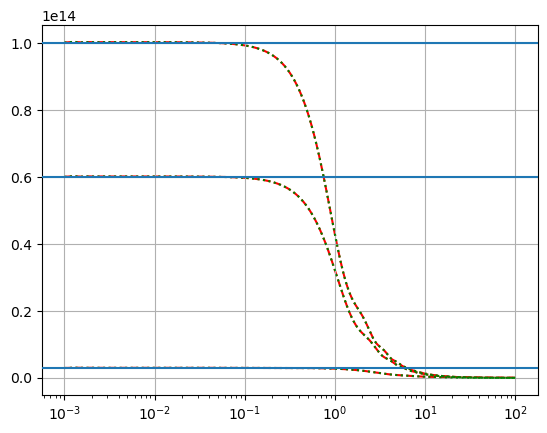

In [44]:
i = 0
for mass in zip(trial_M):
    plt.plot(trial_k, nfw_fourier_true[i], 'r--', zorder=1)
    plt.plot(trial_k, nfw_fourier_false[i], 'g:', zorder=2)
    plt.axhline(mass, zorder=3)
    i+=1
plt.grid(True)
plt.xscale('log');

$\rho(k)\ = \frac{M}{a^3} \bar{g}(k)\ $, where $\bar{g}(k \to 0)\ = 1 $ if normalised correctly.   
Here, using $a = 1$, so [profile/mass] = g(k)

In [47]:
for mass, prof in zip(trial_M, nfw_fourier_false):
    print(prof/mass)

[0.98510123 0.98511895 0.98513669 ... 0.00202506 0.00202466 0.00202427]
[1.00110278e+00 1.00110450e+00 1.00110623e+00 ... 2.00580559e-04
 2.00322825e-04 2.00067353e-04]
[1.00174940e+00 1.00175057e+00 1.00175173e+00 ... 1.33067923e-04
 1.32953542e-04 1.32847282e-04]


# Check Bound Gas

# Now look at integration of stellar

In [53]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(stel_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(stel_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [2.99997e+14 5.99994e+15 9.99990e+15]
Numerical:  [1.64726581e+07 3.29453162e+08 5.49088603e+08]

Simpson method
Analytical:  [2.99997e+14 5.99994e+15 9.99990e+15]
Numerical:  [1.64726581e+07 3.29453162e+08 5.49088603e+08]


In [55]:
for mass, profA, profB in zip(trial_M, stel_fourier, stel_fourier_false):
    print(mass)
    print(profA/mass)
    print(profB/mass)
    

3000000000000.0
[1. 1. 1. ... 1. 1. 1.]
[8.12044216e-03 8.12007387e-03 8.11970555e-03 ... 2.98690123e-13
 2.98712799e-13 2.98735730e-13]
60000000000000.0
[1. 1. 1. ... 1. 1. 1.]
[8.12044216e-03 8.12007387e-03 8.11970555e-03 ... 2.98690123e-13
 2.98712799e-13 2.98735730e-13]
100000000000000.0
[1. 1. 1. ... 1. 1. 1.]
[8.12044216e-03 8.12007387e-03 8.11970555e-03 ... 2.98690123e-13
 2.98712799e-13 2.98735730e-13]


In [57]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(stel_real, x=trial_r))
#print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(stel_real, x=trial_r))
#print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [ 2302608.01731347 46052160.34626944 76753600.57711573]

Simpson method
Analytical:  [ 2302608.01731347 46052160.34626944 76753600.57711573]


In [59]:
for mass, profA, profB, profR in zip(trial_M, stel_fourier, stel_fourier_false, stel_real):
    print('       mass: ', mass, f';  {mass:.1g}')
    print('Real/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profR/mass, x=trial_r), '\n___')
    print('Real/Mass: ', integrate.simpson(profR/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass: ', integrate.simpson(profA/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profA/mass, x=trial_r), '\n___')
    print('Numerical fourier/Mass: ', integrate.simpson(profB/mass, x=trial_r), '\n-----')
    

       mass:  3000000000000.0 ;  3e+12
Real/Mass * 4*pi*r^2:  9.645141908385284e-10 
___
Real/Mass:  7.675360057711572e-07 
___
Analytical fourier/Mass:  99999999.99 
___
Analytical fourier/Mass * 4*pi*r^2:  4.188790204786391e+24 
___
Numerical fourier/Mass:  0.00012697669720620366 
-----
       mass:  60000000000000.0 ;  6e+13
Real/Mass * 4*pi*r^2:  9.645141908385284e-10 
___
Real/Mass:  7.675360057711572e-07 
___
Analytical fourier/Mass:  99999999.99 
___
Analytical fourier/Mass * 4*pi*r^2:  4.188790204786391e+24 
___
Numerical fourier/Mass:  0.00012697669720620797 
-----
       mass:  100000000000000.0 ;  1e+14
Real/Mass * 4*pi*r^2:  9.645141908385284e-10 
___
Real/Mass:  7.675360057711572e-07 
___
Analytical fourier/Mass:  99999999.99 
___
Analytical fourier/Mass * 4*pi*r^2:  4.188790204786391e+24 
___
Numerical fourier/Mass:  0.00012697669720620396 
-----


In [61]:
print(99999999.99 , 1/99999999.99 )
print(9.645141908385284e-10 , 1/9.645141908385284e-10 , f' {1/9.645141908385284e-10:.3g} ')

99999999.99 1.0000000001e-08
9.645141908385284e-10 1036791381.0896044  1.04e+09 
